In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df1=pd.read_csv(r'E:\EDU\Projects- Data Science\house-prices-advanced-regression-techniques\train.csv')
df2=pd.read_csv(r'E:\EDU\Projects- Data Science\house-prices-advanced-regression-techniques\test.csv')

#df1["Is train data"] = True
#df2["Is train data"] = False
#df2["SalePrice"]= None

#globaldata = pd.concat([df1,df2])

In [ ]:
globaldata.info()

In [ ]:
pd.set_option('display.max_rows', 500)
((globaldata.isna().sum()/len(globaldata)*100).round(3))

In [ ]:
globaldata["MSZoning"]=globaldata["MSZoning"].fillna(globaldata["MSZoning"].mode()[0])

In [ ]:
globaldata["LotFrontage"]=globaldata["LotFrontage"].fillna(globaldata["LotFrontage"].mean())

In [ ]:
globaldata.drop(['Alley'],axis=1,inplace=True)

In [ ]:
globaldata["Utilities"]=globaldata["Utilities"].fillna(globaldata["Utilities"].mode()[0])
globaldata["Exterior1st"]=globaldata["Exterior1st"].fillna(globaldata["Exterior1st"].mode()[0])
globaldata["Exterior2nd"]=globaldata["Exterior2nd"].fillna(globaldata["Exterior2nd"].mode()[0])

In [ ]:
globaldata.drop(['MasVnrType','MasVnrArea'],axis=1,inplace=True)

In [ ]:
#BsmtQual         2.775 
#BsmtCond         2.809 
#BsmtExposure     2.809 
#BsmtFinType1     2.706 
#BsmtFinSF1       0.034 
#BsmtFinType2     2.741 
#BsmtFinSF2       0.034 
#BsmtUnfSF        0.034 
#TotalBsmtSF      0.034 
globaldata["BsmtQual"]=globaldata["BsmtQual"].fillna(globaldata["BsmtQual"].mode()[0])
globaldata["BsmtCond"]=globaldata["BsmtCond"].fillna(globaldata["BsmtCond"].mode()[0])
globaldata["BsmtExposure"]=globaldata["BsmtExposure"].fillna(globaldata["BsmtExposure"].mode()[0])
globaldata["BsmtFinType1"]=globaldata["BsmtFinType1"].fillna(globaldata["BsmtFinType1"].mode()[0])
globaldata["BsmtFinType2"]=globaldata["BsmtFinType2"].fillna(globaldata["BsmtFinType2"].mode()[0])
globaldata["BsmtFinSF1"]=globaldata["BsmtFinSF1"].fillna(globaldata["BsmtFinSF1"].mean())
globaldata["BsmtFinSF2"]=globaldata["BsmtFinSF2"].fillna(globaldata["BsmtFinSF2"].mean())
globaldata["BsmtUnfSF"]=globaldata["BsmtUnfSF"].fillna(globaldata["BsmtUnfSF"].mean())
globaldata["TotalBsmtSF"]=globaldata["TotalBsmtSF"].fillna(globaldata["TotalBsmtSF"].mean())

In [ ]:
#Electrical       0.034 
#BsmtFullBath     0.069 
#BsmtHalfBath     0.069 
#KitchenQual      0.034 
#Functional       0.069 
#FireplaceQu      48.647
#GarageType       5.379 
#GarageYrBlt      5.447 
#GarageFinish     5.447 
#GarageCars       0.034 
#GarageArea       0.034 
#GarageQual       5.447 
#GarageCond       5.447 
#PoolQC           99.657
#Fence            80.439
#MiscFeature      96.403 
#SaleType         0.034
#SalePrice        49.983 DO NOT DELETE this Column 
globaldata["Electrical"]=globaldata["Electrical"].fillna(globaldata["Electrical"].mode()[0])
globaldata["BsmtFullBath"]=globaldata["BsmtFullBath"].fillna(globaldata["BsmtFullBath"].mean())
globaldata["BsmtHalfBath"]=globaldata["BsmtHalfBath"].fillna(globaldata["BsmtHalfBath"].mean())
globaldata["KitchenQual"]=globaldata["KitchenQual"].fillna(globaldata["KitchenQual"].mode()[0])
globaldata["KitchenQual"]=globaldata["KitchenQual"].fillna(globaldata["KitchenQual"].mode()[0])
globaldata.drop(['FireplaceQu',"PoolQC","Fence","MiscFeature"],axis=1,inplace=True)
globaldata["GarageType"]=globaldata["GarageType"].fillna(globaldata["GarageType"].mode()[0])
globaldata["GarageYrBlt"]=globaldata["GarageYrBlt"].fillna(globaldata["GarageYrBlt"].mean())
globaldata["GarageFinish"]=globaldata["GarageFinish"].fillna(globaldata["GarageFinish"].mode()[0])
globaldata["GarageCars"]=globaldata["GarageCars"].fillna(globaldata["GarageCars"].mean())
globaldata["GarageArea"]=globaldata["GarageArea"].fillna(globaldata["GarageArea"].mean())
globaldata["GarageQual"]=globaldata["GarageQual"].fillna(globaldata["GarageQual"].mode()[0])
globaldata["GarageCond"]=globaldata["GarageCond"].fillna(globaldata["GarageCond"].mode()[0])
globaldata["SaleType"]=globaldata["SaleType"].fillna(globaldata["SaleType"].mode()[0])

In [ ]:
pd.set_option('display.max_rows', 10)
((globaldata.isna().sum()/len(globaldata)*100).round(3))

In [ ]:
train= globaldata[globaldata["Is train data"]== True ]
train.drop(["Is train data"],axis=1,inplace=True)
train.head()

In [ ]:
test= globaldata[globaldata["Is train data"]== False ]
test.drop(["SalePrice","Is train data"],axis=1,inplace=True)
test.head()

In [2]:
from pycaret.regression import *

In [3]:
reg= setup(data= df1, target = 'SalePrice',train_size= 0.7,numeric_features=['OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 
                               'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 
                               'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'PoolArea'],          
    categorical_imputation= 'mode',feature_selection = True,feature_selection_threshold= 0.8,ignore_low_variance = True, combine_rare_levels =True,
    remove_outliers= True,feature_interaction = False, feature_ratio = False,silent = True,normalize = True, normalize_method = 'zscore',
    transformation_method = 'yeo-johnson', transform_target = True,
           ordinal_features= {'ExterQual': ['Fa', 'TA', 'Gd', 'Ex'],
                                'ExterCond' : ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                                'BsmtQual' : ['Fa', 'TA', 'Gd', 'Ex'], 
                                'BsmtCond' : ['Po', 'Fa', 'TA', 'Gd'],
                                'BsmtExposure' : ['No', 'Mn', 'Av', 'Gd'],
                                'HeatingQC' : ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                                'KitchenQual' : ['Fa', 'TA', 'Gd', 'Ex'],
                                'GarageQual' : ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                                'GarageCond' : ['Po', 'Fa', 'TA', 'Gd', 'Ex']})

 
Setup Succesfully Completed!


,Description,Value
0,session_id,1947
1,Transform Target,True
2,Transform Target Method,box-cox
3,Original Data,"(1460, 81)"
4,Missing Values,True
5,Numeric Features,33
6,Categorical Features,46
7,Ordinal Features,True
8,High Cardinality Features,False
9,High Cardinality Method,None


In [4]:
compare_models(blacklist =['tr'],turbo = True)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,16723.174500,944197192.881900,29085.199700,0.830900,0.132800,0.093200
1,CatBoost Regressor,14816.432100,961231082.926300,28498.497100,0.823100,0.121200,0.081900
2,Gradient Boosting Regressor,15991.520900,933990174.540600,28348.870800,0.822900,0.127300,0.089200
3,Extreme Gradient Boosting,16236.884400,963764173.718500,28852.735100,0.818800,0.128500,0.090300
4,Random Forest,17768.705300,1083183836.921300,31397.844100,0.808400,0.142200,0.098000
5,Extra Trees Regressor,17397.572700,1128435217.513400,31778.610300,0.800400,0.138100,0.094700
6,AdaBoost Regressor,22496.322500,1406526063.595300,36177.388300,0.769400,0.166800,0.122900
7,Support Vector Machine,26534.005600,1627278549.855700,39531.157800,0.715600,0.201400,0.155600
8,Random Sample Consensus,15566.798900,1404751012.032500,29482.674600,0.680000,0.128500,0.090900
9,Ridge Regression,15981.493600,1433310023.091000,30061.816500,0.674500,0.127300,0.091300


In [ ]:
#catboost = create_model('catboost')
ridge= create_model('ridge')
br= create_model('br')
rf = create_model('rf')
#lightgbm = create_model('lightgbm')
#xgboost= create_model('xgboost')
#gbr= create_model('gbr')

In [6]:
#blend top 5 
catboost = tune_model('catboost', n_iter = 50)
xgboost = tune_model('xgboost', n_iter = 100)
gbr = tune_model('gbr', n_iter = 100)
rf = tune_model('rf', n_iter = 100)
lightgbm = tune_model('lightgbm', n_iter = 50)
et = tune_model('et', n_iter = 100)

blend_specific = blend_models([catboost,xgboost,gbr,rf,lightgbm,et] )

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,15669.7509,1.315192e+09,36265.5756,0.8448,0.1151,0.0768
1,17213.8043,2.241181e+09,47341.1159,0.4314,0.1605,0.1008
2,16635.1116,1.147778e+09,33878.8741,0.8549,0.1253,0.0807
3,13308.4684,4.222920e+08,20549.7442,0.9208,0.1130,0.0789
4,16719.8490,7.833406e+08,27988.2230,0.8970,0.1128,0.0845
5,18963.2357,1.747697e+09,41805.4688,0.7906,0.1317,0.0833
6,10589.2299,2.435989e+08,15607.6542,0.9015,0.1010,0.0692
7,11773.0300,2.422355e+08,15563.9164,0.9348,0.0884,0.0686
8,14565.6752,4.814272e+08,21941.4502,0.9151,0.1268,0.0861
9,15077.5837,5.067244e+08,22510.5400,0.8971,0.1538,0.0988


In [ ]:
tuned = tune_model('ridge')
tuned1 = tune_model('br')
interpret_model(rf)

In [ ]:
interpret_model(tuned, plot = 'correlation', feature = 'OverallQual')

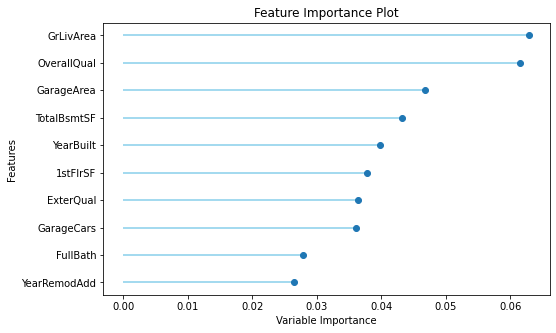

In [14]:
plot_model(rf,'feature') #'learning','vc','error'

In [ ]:
#blend_specific = blend_models(estimator_list = [catboost,rf,lightgbm,xgboost,gbr])
blend_specific = blend_models([tuned1,tuned] )

In [7]:
final_blender = finalize_model(blend_specific)

In [8]:
predictions = predict_model(final_blender, data = df2)

In [9]:
import os
os.getcwd()

'D:\\'

In [10]:
os.chdir('E:\EDU\Projects- Data Science\house-prices-advanced-regression-techniques')

In [11]:
os.chdir('E:\EDU\Projects- Data Science\house-prices-advanced-regression-techniques')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Label
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,122495.5587
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,157068.6103
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,181190.9502
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,188954.7358
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,186398.6360


In [12]:
#predictions['Label']
sub_df=pd.read_csv(r'E:\EDU\Projects- Data Science\house-prices-advanced-regression-techniques\test.csv')
datasets=pd.concat([sub_df['Id'],predictions['Label']],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission.csv',index=False)